In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import pylab as plot

In [2]:
def write_as_log2(title,data):
    '''
    Function can be used to write a log in the logs folder. 
    Data has to be an array 
    '''
    with open(f'{title}.txt','w') as temp:
        if type(data) == list:
            temp.write(str(data))
        if type(data) == dict:
            for row in data.items():
                temp.write(str(row))
                temp.write('\n')

### create converter to MB's 


In [3]:
data = pd.read_csv(r'data/data_after_cleaning_norm_dummy.csv')

In [4]:
transformer_mb = pd.DataFrame()
transformer_mb['features'] = all_features = list(data.columns)

In [5]:
API_endpoints = {
    'twitter_info_aggregated':21.97,
    'econ_bitcoin_aggregator':5.75,
    'events_aggregator':8.83,
    'technical':30.28,
    'hash_rate_ethereum':37.85,
    'exchange_info':5.65,
    'biggest_coin':3.98,
    'streamer_bitcoin':40.74,
    'stock_exchange':10.66,
    'ticker_info':40.71,
    '__general_info__':44.31
}

counter_groups = {
    21.97:1,
    5.75:2,
    8.83:3,
    30.28:4,
    37.85:5,
    5.65:6,
    3.98:7,
    40.74:8,
    10.66:9,
    40.71:10,
    44.31:11
}

data_type={
    1:'sentiment_&_interest_based',
    2:'sentiment_&_interest_based',
    3:'sentiment_&_interest_based',
    4:'financial_based',
    5:'blockchain_specific',
    6:'financial_based',
    7:'financial_based',
    8:'blockchain_specific',
    9:'financial_based',
    10:'general_data',
    11:'general_data'
}

In [6]:
for i in list(API_endpoints.values()):
    print(i)

21.97
5.75
8.83
30.28
37.85
5.65
3.98
40.74
10.66
40.71
44.31


In [7]:
def cumm_counter_API(Dataframe):
    eindlijst = [] 
    al_geweest = []
    count = 0
    for i in Dataframe['API']:
        if i not in al_geweest:
            al_geweest.append(i)
            count +=1
            eindlijst.append(count)
        elif i in al_geweest:
            eindlijst.append(count)
    return eindlijst

### open and transform the feature sets

In [8]:
SVC_RFE = pd.read_csv('results/Combining/final_columns_svc_rfe.csv')
SVC_RFE['imp_abs_norm'] = SVC_RFE['imp_abs']/sum(SVC_RFE['imp_abs'])
SVC_RFE.head()

,var,imp,imp_abs,imp_abs_norm
0,ETHBTC__ticker_info__open,34.038558,34.038558,0.210410
1,ETHBTC__technical_analysis_candles__macdhist,-20.891518,20.891518,0.129141
2,general_info__biggest_coin_streamer__ETHBTC,-15.362761,15.362761,0.094965
3,ETHBTC__technical_analysis_candles__macd,14.005452,14.005452,0.086575
4,ETHBTC__technical_analysis_candles__rsi,-12.440402,12.440402,0.076901


In [9]:
SVC_RFE['cost_in_mb'] = np.where(SVC_RFE['var'].str.contains("twitter_info_aggregated", case=False, na=False), float(21.97), '')
SVC_RFE['cost_in_mb2'] = np.where(SVC_RFE['var'].str.contains("econ_bitcoin_aggregator", case=False, na=False), float(5.75), '')
SVC_RFE['cost_in_mb3'] = np.where(SVC_RFE['var'].str.contains("events_aggregator", case=False, na=False), float(8.83), '')
SVC_RFE['cost_in_mb4'] = np.where(SVC_RFE['var'].str.contains("technical", case=False, na=False), float(30.28), '')
SVC_RFE['cost_in_mb5'] = np.where(SVC_RFE['var'].str.contains("hash_rate_ethereum", case=False, na=False), float(37.85), '')
SVC_RFE['cost_in_mb6'] = np.where(SVC_RFE['var'].str.contains("exchange_info", case=False, na=False), float(5.65), '')
SVC_RFE['cost_in_mb7'] = np.where(SVC_RFE['var'].str.contains("biggest_coin", case=False, na=False), float(3.98), '')
SVC_RFE['cost_in_mb8'] = np.where(SVC_RFE['var'].str.contains("streamer_bitcoin", case=False, na=False), float(40.74), '')
SVC_RFE['cost_in_mb9'] = np.where(SVC_RFE['var'].str.contains("stock_exchange", case=False, na=False), float(10.66), '')
SVC_RFE['cost_in_mb10'] = np.where(SVC_RFE['var'].str.contains("ticker_info", case=False, na=False), float(40.71), '')
SVC_RFE['cost_in_mb11'] = np.where(SVC_RFE['var'].str.contains("__general_info__", case=False, na=False), float(44.31), '')

In [10]:
SVC_RFE['mb'] = SVC_RFE['cost_in_mb'] + SVC_RFE['cost_in_mb2'] + SVC_RFE['cost_in_mb3'] + SVC_RFE['cost_in_mb4'] + SVC_RFE['cost_in_mb5'] + SVC_RFE['cost_in_mb6'] + SVC_RFE['cost_in_mb7'] + SVC_RFE['cost_in_mb8'] + SVC_RFE['cost_in_mb9'] + SVC_RFE['cost_in_mb10'] + SVC_RFE['cost_in_mb11']  
SVC_RFE = SVC_RFE.drop(columns= ['cost_in_mb', 'cost_in_mb2','cost_in_mb3','cost_in_mb4','cost_in_mb5','cost_in_mb6','cost_in_mb7','cost_in_mb8','cost_in_mb9','cost_in_mb10','cost_in_mb11'])
SVC_RFE['mb'] = SVC_RFE['mb'].astype(float)
SVC_RFE['API'] = SVC_RFE['mb'].map(counter_groups)
SVC_RFE['cum'] = SVC_RFE['imp_abs_norm'].cumsum()
SVC_RFE['cum_mb'] = SVC_RFE['mb'].cumsum()
SVC_RFE['cum_API'] = cumm_counter_API(SVC_RFE)
SVC_RFE['category'] = SVC_RFE['API'].map(data_type)
SVC_RFE.head()

,var,imp,imp_abs,imp_abs_norm,mb,API,cum,cum_mb,cum_API,category
0,ETHBTC__ticker_info__open,34.038558,34.038558,0.210410,40.71,10,0.210410,40.71,1,general_data
1,ETHBTC__technical_analysis_candles__macdhist,-20.891518,20.891518,0.129141,30.28,4,0.339552,70.99,2,financial_based
2,general_info__biggest_coin_streamer__ETHBTC,-15.362761,15.362761,0.094965,3.98,7,0.434517,74.97,3,financial_based
3,ETHBTC__technical_analysis_candles__macd,14.005452,14.005452,0.086575,30.28,4,0.521092,105.25,3,financial_based
4,ETHBTC__technical_analysis_candles__rsi,-12.440402,12.440402,0.076901,30.28,4,0.597993,135.53,3,financial_based


<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>


In [11]:
RF_RFE = pd.read_csv('results/Combining/final_columns_rf_rfe.csv')
RF_RFE.head()

,var,imp
0,ETHBTC__technical_analysis_candles__rsi,0.112650
1,ETHBTC__technical_analysis_candles__macdhist,0.022072
2,ETHBTC__technical_analysis_candles__macd,0.019724
3,ETHBTC__ticker_info__taker_buy_asset_volume,0.016933
4,ETHBTC__ticker_info__number_trades,0.011073


In [12]:
RF_RFE['cost_in_mb'] = np.where(RF_RFE['var'].str.contains("twitter_info_aggregated", case=False, na=False), float(21.97), '')
RF_RFE['cost_in_mb2'] = np.where(RF_RFE['var'].str.contains("econ_bitcoin_aggregator", case=False, na=False), float(5.75), '')
RF_RFE['cost_in_mb3'] = np.where(RF_RFE['var'].str.contains("events_aggregator", case=False, na=False), float(8.83), '')
RF_RFE['cost_in_mb4'] = np.where(RF_RFE['var'].str.contains("technical", case=False, na=False), float(30.28), '')
RF_RFE['cost_in_mb5'] = np.where(RF_RFE['var'].str.contains("hash_rate_ethereum", case=False, na=False), float(37.85), '')
RF_RFE['cost_in_mb6'] = np.where(RF_RFE['var'].str.contains("exchange_info", case=False, na=False), float(5.65), '')
RF_RFE['cost_in_mb7'] = np.where(RF_RFE['var'].str.contains("biggest_coin", case=False, na=False), float(3.98), '')
RF_RFE['cost_in_mb8'] = np.where(RF_RFE['var'].str.contains("streamer_bitcoin", case=False, na=False), float(40.74), '')
RF_RFE['cost_in_mb9'] = np.where(RF_RFE['var'].str.contains("stock_exchange", case=False, na=False), float(10.66), '')
RF_RFE['cost_in_mb10'] = np.where(RF_RFE['var'].str.contains("ticker_info", case=False, na=False), float(40.71), '')
RF_RFE['cost_in_mb11'] = np.where(RF_RFE['var'].str.contains("__general_info__", case=False, na=False), float(44.31), '')

In [13]:
RF_RFE['mb'] = RF_RFE['cost_in_mb'] + RF_RFE['cost_in_mb2'] + RF_RFE['cost_in_mb3'] + RF_RFE['cost_in_mb4'] + RF_RFE['cost_in_mb5'] + RF_RFE['cost_in_mb6'] + RF_RFE['cost_in_mb7'] + RF_RFE['cost_in_mb8'] + RF_RFE['cost_in_mb9'] + RF_RFE['cost_in_mb10'] + RF_RFE['cost_in_mb11']  
RF_RFE = RF_RFE.drop(columns= ['cost_in_mb', 'cost_in_mb2','cost_in_mb3','cost_in_mb4','cost_in_mb5','cost_in_mb6','cost_in_mb7','cost_in_mb8','cost_in_mb9','cost_in_mb10','cost_in_mb11'])
RF_RFE['mb'] = RF_RFE['mb'].astype(float)
RF_RFE['API'] = RF_RFE['mb'].map(counter_groups)
RF_RFE['imp_norm'] = RF_RFE['imp']/sum(RF_RFE['imp'])
RF_RFE['cum'] = RF_RFE['imp_norm'].cumsum()
RF_RFE['cum_mb'] = RF_RFE['mb'].cumsum()
RF_RFE['cum_API'] = cumm_counter_API(RF_RFE)
RF_RFE['category'] = RF_RFE['API'].map(data_type)
RF_RFE.head()

,var,imp,mb,API,imp_norm,cum,cum_mb,cum_API,category
0,ETHBTC__technical_analysis_candles__rsi,0.112650,30.28,4,0.205665,0.205665,30.28,1,financial_based
1,ETHBTC__technical_analysis_candles__macdhist,0.022072,30.28,4,0.040297,0.245962,60.56,1,financial_based
2,ETHBTC__technical_analysis_candles__macd,0.019724,30.28,4,0.036010,0.281971,90.84,1,financial_based
3,ETHBTC__ticker_info__taker_buy_asset_volume,0.016933,40.71,10,0.030914,0.312886,131.55,2,general_data
4,ETHBTC__ticker_info__number_trades,0.011073,40.71,10,0.020217,0.333103,172.26,2,general_data


<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>


In [14]:
Boruta = pd.read_csv('results/Combining/final_columns_boruta.csv')
Boruta['mean_imp_abs'] = abs(Boruta['meanImp'])
Boruta['mean_imp_abs_norm'] = Boruta['mean_imp_abs']/sum(Boruta['mean_imp_abs'])
Boruta.head()

,var,meanImp,medianImp,minImp,maxImp,normHits,decision,mean_imp_abs,mean_imp_abs_norm
0,ETHBTC__technical_analysis_candles__rsi,46.337282,46.585747,42.019642,49.241712,1.0,Confirmed,46.337282,0.089259
1,ETHBTC__ticker_info__taker_buy_asset_volume,24.465418,24.477064,22.043469,26.653377,1.0,Confirmed,24.465418,0.047128
2,ETHBTC__technical_analysis_candles__macdhist,19.502117,19.480398,17.025955,21.545275,1.0,Confirmed,19.502117,0.037567
3,ETHBTC__ticker_info__number_trades,17.631639,17.675714,14.868579,21.019669,1.0,Confirmed,17.631639,0.033964
4,ETHBTC__technical_analysis_candles__macd,16.522427,16.695044,13.762017,18.220087,1.0,Confirmed,16.522427,0.031827


In [15]:
Boruta['cost_in_mb'] = np.where(Boruta['var'].str.contains("twitter_info_aggregated", case=False, na=False), float(21.97), '')
Boruta['cost_in_mb2'] = np.where(Boruta['var'].str.contains("econ_bitcoin_aggregator", case=False, na=False), float(5.75), '')
Boruta['cost_in_mb3'] = np.where(Boruta['var'].str.contains("events_aggregator", case=False, na=False), float(8.83), '')
Boruta['cost_in_mb4'] = np.where(Boruta['var'].str.contains("technical", case=False, na=False), float(30.28), '')
Boruta['cost_in_mb5'] = np.where(Boruta['var'].str.contains("hash_rate_ethereum", case=False, na=False), float(37.85), '')
Boruta['cost_in_mb6'] = np.where(Boruta['var'].str.contains("exchange_info", case=False, na=False), float(5.65), '')
Boruta['cost_in_mb7'] = np.where(Boruta['var'].str.contains("biggest_coin", case=False, na=False), float(3.98), '')
Boruta['cost_in_mb8'] = np.where(Boruta['var'].str.contains("streamer_bitcoin", case=False, na=False), float(40.74), '')
Boruta['cost_in_mb9'] = np.where(Boruta['var'].str.contains("stock_exchange", case=False, na=False), float(10.66), '')
Boruta['cost_in_mb10'] = np.where(Boruta['var'].str.contains("ticker_info", case=False, na=False), float(40.71), '')
Boruta['cost_in_mb11'] = np.where(Boruta['var'].str.contains("__general_info__", case=False, na=False), float(44.31), '')

In [16]:
Boruta['mb'] = Boruta['cost_in_mb'] + Boruta['cost_in_mb2'] + Boruta['cost_in_mb3'] + Boruta['cost_in_mb4'] + Boruta['cost_in_mb5'] + Boruta['cost_in_mb6'] + Boruta['cost_in_mb7'] + Boruta['cost_in_mb8'] + Boruta['cost_in_mb9'] + Boruta['cost_in_mb10'] + Boruta['cost_in_mb11']  
Boruta = Boruta.drop(columns= ['cost_in_mb', 'cost_in_mb2','cost_in_mb3','cost_in_mb4','cost_in_mb5','cost_in_mb6','cost_in_mb7','cost_in_mb8','cost_in_mb9','cost_in_mb10','cost_in_mb11'])
Boruta['mb'] = Boruta['mb'].astype(float)
Boruta['API'] = Boruta['mb'].map(counter_groups)
Boruta['cum'] = Boruta['mean_imp_abs_norm'].cumsum()
Boruta['cum_mb'] = Boruta['mb'].cumsum()
Boruta['cum_API'] = cumm_counter_API(Boruta)
Boruta['category'] = Boruta['API'].map(data_type)
Boruta.head()

,var,meanImp,medianImp,minImp,maxImp,normHits,decision,mean_imp_abs,mean_imp_abs_norm,mb,API,cum,cum_mb,cum_API,category
0,ETHBTC__technical_analysis_candles__rsi,46.337282,46.585747,42.019642,49.241712,1.0,Confirmed,46.337282,0.089259,30.28,4,0.089259,30.28,1,financial_based
1,ETHBTC__ticker_info__taker_buy_asset_volume,24.465418,24.477064,22.043469,26.653377,1.0,Confirmed,24.465418,0.047128,40.71,10,0.136387,70.99,2,general_data
2,ETHBTC__technical_analysis_candles__macdhist,19.502117,19.480398,17.025955,21.545275,1.0,Confirmed,19.502117,0.037567,30.28,4,0.173954,101.27,2,financial_based
3,ETHBTC__ticker_info__number_trades,17.631639,17.675714,14.868579,21.019669,1.0,Confirmed,17.631639,0.033964,40.71,10,0.207918,141.98,2,general_data
4,ETHBTC__technical_analysis_candles__macd,16.522427,16.695044,13.762017,18.220087,1.0,Confirmed,16.522427,0.031827,30.28,4,0.239745,172.26,2,financial_based


<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>


In [17]:
XGBoost = pd.read_csv('results/Combining/final_columns_XGBoost.csv')
XGBoost['imp_norm'] = XGBoost['imp']/sum(XGBoost['imp'])
XGBoost.head()

,var,imp,imp_norm
0,ETHBTC__technical_analysis_candles__rsi,19374,0.059342
1,ETHBTC__technical_analysis_candles__macdhist,17927,0.054910
2,ETHBTC__technical_analysis_candles__macd,14729,0.045115
3,ETHBTC__ticker_info__open,14212,0.043531
4,ETHBTC__ticker_info__bidQty,6650,0.020369


In [18]:
XGBoost['cost_in_mb'] = np.where(XGBoost['var'].str.contains("twitter_info_aggregated", case=False, na=False), float(21.97), '')
XGBoost['cost_in_mb2'] = np.where(XGBoost['var'].str.contains("econ_bitcoin_aggregator", case=False, na=False), float(5.75), '')
XGBoost['cost_in_mb3'] = np.where(XGBoost['var'].str.contains("events_aggregator", case=False, na=False), float(8.83), '')
XGBoost['cost_in_mb4'] = np.where(XGBoost['var'].str.contains("technical", case=False, na=False), float(30.28), '')
XGBoost['cost_in_mb5'] = np.where(XGBoost['var'].str.contains("hash_rate_ethereum", case=False, na=False), float(37.85), '')
XGBoost['cost_in_mb6'] = np.where(XGBoost['var'].str.contains("exchange_info", case=False, na=False), float(5.65), '')
XGBoost['cost_in_mb7'] = np.where(XGBoost['var'].str.contains("biggest_coin", case=False, na=False), float(3.98), '')
XGBoost['cost_in_mb8'] = np.where(XGBoost['var'].str.contains("streamer_bitcoin", case=False, na=False), float(40.74), '')
XGBoost['cost_in_mb9'] = np.where(XGBoost['var'].str.contains("stock_exchange", case=False, na=False), float(10.66), '')
XGBoost['cost_in_mb10'] = np.where(XGBoost['var'].str.contains("ticker_info", case=False, na=False), float(40.71), '')
XGBoost['cost_in_mb11'] = np.where(XGBoost['var'].str.contains("__general_info__", case=False, na=False), float(44.31), '')

In [19]:
XGBoost['mb'] = XGBoost['cost_in_mb'] + XGBoost['cost_in_mb2'] + XGBoost['cost_in_mb3'] + XGBoost['cost_in_mb4'] + XGBoost['cost_in_mb5'] + XGBoost['cost_in_mb6'] + XGBoost['cost_in_mb7'] + XGBoost['cost_in_mb8'] + XGBoost['cost_in_mb9'] + XGBoost['cost_in_mb10'] + XGBoost['cost_in_mb11']  
XGBoost = XGBoost.drop(columns= ['cost_in_mb', 'cost_in_mb2','cost_in_mb3','cost_in_mb4','cost_in_mb5','cost_in_mb6','cost_in_mb7','cost_in_mb8','cost_in_mb9','cost_in_mb10','cost_in_mb11'])
XGBoost['mb'] = XGBoost['mb'].astype(float)
XGBoost['API'] = XGBoost['mb'].map(counter_groups)
XGBoost['cum'] = XGBoost['imp_norm'].cumsum()
XGBoost['cum_mb'] = XGBoost['mb'].cumsum()
XGBoost['cum_API'] = cumm_counter_API(XGBoost)
XGBoost['category'] = XGBoost['API'].map(data_type)
XGBoost.head()

,var,imp,imp_norm,mb,API,cum,cum_mb,cum_API,category
0,ETHBTC__technical_analysis_candles__rsi,19374,0.059342,30.28,4,0.059342,30.28,1,financial_based
1,ETHBTC__technical_analysis_candles__macdhist,17927,0.054910,30.28,4,0.114253,60.56,1,financial_based
2,ETHBTC__technical_analysis_candles__macd,14729,0.045115,30.28,4,0.159368,90.84,1,financial_based
3,ETHBTC__ticker_info__open,14212,0.043531,40.71,10,0.202899,131.55,2,general_data
4,ETHBTC__ticker_info__bidQty,6650,0.020369,40.71,10,0.223268,172.26,2,general_data


<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>


### plotting

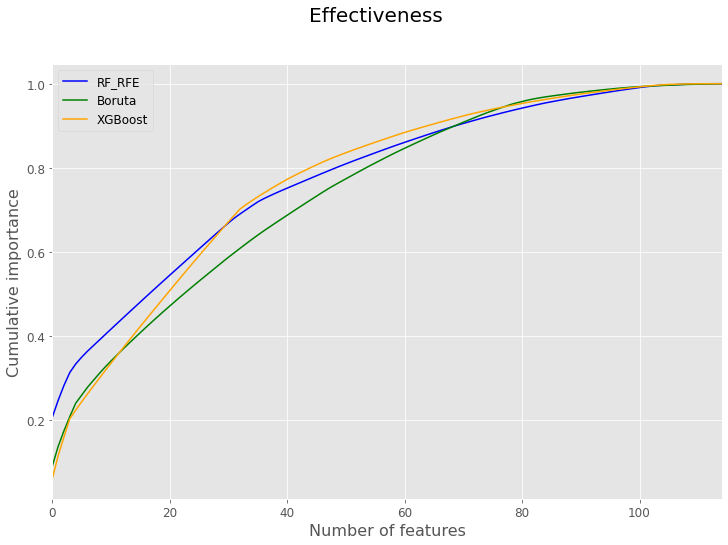

In [20]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plot.rcParams.update(params)


plt.style.use('ggplot');
plt.figure(figsize=(12,8))
ax = plt.gca()
plt.xlabel('Number of features',fontsize=16)
plt.ylabel('Cumulative importance', fontsize=16)
plt.suptitle('Effectiveness', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# SVC_RFE.plot(kind='line',y='cum',color='red', ax=ax, label='SVC_RFE')
RF_RFE.plot(kind='line',y='cum', color='blue', ax=ax, label='RF_RFE')
Boruta.plot(kind='line',y='cum', color='green', ax=ax, label='Boruta')
XGBoost.plot(kind='line',y='cum', color='orange', ax=ax, label='XGBoost')
plt.show()

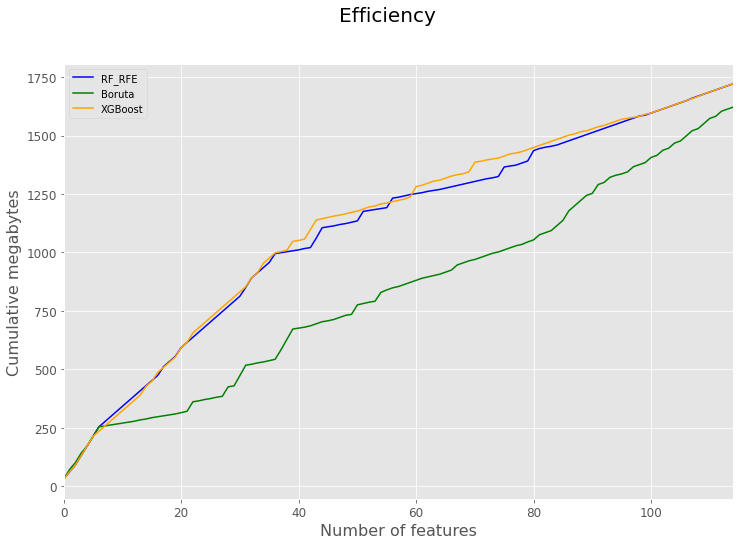

In [21]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plot.rcParams.update(params)


plt.style.use('ggplot');
plt.figure(figsize=(12,8))

ax = plt.gca()
plt.xlabel('Number of features',fontsize=16)
plt.ylabel('Cumulative megabytes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle('Efficiency', fontsize=20)



# SVC_RFE.plot(kind='line',y='cum_mb',color='red', ax=ax, label='SVC_RFE')
RF_RFE.plot(kind='line',y='cum_mb', color='blue', ax=ax, label='RF_RFE')
Boruta.plot(kind='line',y='cum_mb', color='green', ax=ax, label='Boruta')
XGBoost.plot(kind='line',y='cum_mb', color='orange', ax=ax, label='XGBoost')
plt.show()

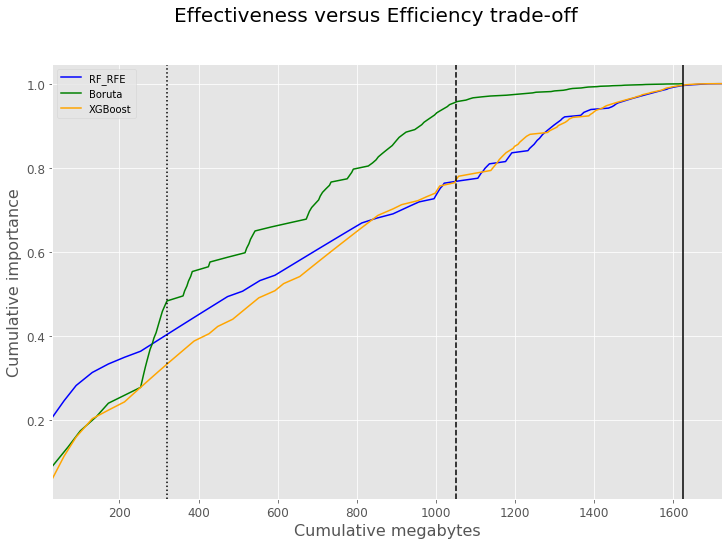

In [22]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plot.rcParams.update(params)

#graph style
plt.style.use('ggplot');
plt.figure(figsize=(12,8))
ax = plt.gca()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle('Effectiveness versus Efficiency trade-off', fontsize=20)
#adding axis
# SVC_RFE.plot(kind='line',x='cum_mb',y='cum',color='red', ax=ax, label='SVC_RFE')
RF_RFE.plot(kind='line',x='cum_mb',y='cum', color='blue', ax=ax, label='RF_RFE')
Boruta.plot(kind='line',x='cum_mb',y='cum', color='green', ax=ax, label='Boruta')
XGBoost.plot(kind='line',x='cum_mb',y='cum', color='orange', ax=ax, label='XGBoost')

#plot
plt.xlabel('Cumulative megabytes',fontsize=16)
plt.ylabel('Cumulative importance', fontsize=16)


plt.axvline(x=320,color='black',linestyle=':', label = 'Scenario 1')
plt.axvline(x=1050,color='black',linestyle='dashed', label = 'Scenario 2')
plt.axvline(x=1625,color='black', label = 'Scenario 3')
plt.show()

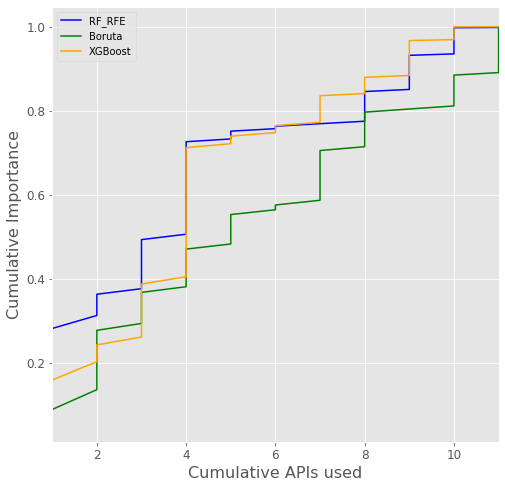

In [23]:
#importing & settings
import matplotlib.pyplot as plt
import pylab as plot
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plot.rcParams.update(params)

#graph style
plt.style.use('ggplot');
plt.figure(figsize=(8,8))
ax = plt.gca()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#adding axis
# SVC_RFE.plot(kind='line',x='cum_API',y='cum',color='red', ax=ax, label='SVC_RFE')
RF_RFE.plot(kind='line',x='cum_API',y='cum', color='blue', ax=ax, label='RF_RFE')
Boruta.plot(kind='line',x='cum_API',y='cum', color='green', ax=ax, label='Boruta')
XGBoost.plot(kind='line',x='cum_API',y='cum', color='orange', ax=ax, label='XGBoost')

#plot
plt.xlabel('Cumulative APIs used',fontsize=16)
plt.ylabel('Cumulative Importance', fontsize=16)
plt.show()

## transform scenario's to feature sets :


In [24]:
Boruta_scenario_1 = copy.deepcopy(Boruta)
Boruta_scenario_2 = copy.deepcopy(Boruta)
Boruta_scenario_3 = copy.deepcopy(Boruta)
indexNames1 = Boruta[(Boruta['cum_mb'] >= 320)].index
indexNames2 = Boruta[(Boruta['cum_mb'] >= 1060)].index
indexNames3 = Boruta[(Boruta['cum_mb'] >= 1630)].index

Boruta_scenario_1.drop(indexNames1 , inplace=True)
Boruta_scenario_1_features = list(Boruta_scenario_1['var'])
Boruta_scenario_2.drop(indexNames2 , inplace=True)
Boruta_scenario_2_features = list(Boruta_scenario_2['var'])
Boruta_scenario_3.drop(indexNames3 , inplace=True)
Boruta_scenario_3_features = list(Boruta_scenario_3['var'])

In [25]:
Boruta['color'] = Boruta['category']

In [40]:
Boruta['color'][1] = 'firebrick'
Boruta['color'] = Boruta['color'].replace('general_data', 'firebrick')
Boruta['color'] = Boruta['color'].replace('financial_based', 'steelblue')
Boruta['color'] = Boruta['color'].replace('sentiment_&_interest_based', 'darkorange')
Boruta['color'] = Boruta['color'].replace('blockchain_specific', 'green')

C:\Users\lexfo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
Boruta

,var,meanImp,medianImp,minImp,maxImp,normHits,decision,mean_imp_abs,mean_imp_abs_norm,mb,API,cum,cum_mb,cum_API,category,color
0,ETHBTC__technical_analysis_candles__rsi,46.337282,46.585747,42.019642,49.241712,1.000000,Confirmed,46.337282,0.089259,30.28,4,0.089259,30.28,1,financial_based,steelblue
1,ETHBTC__ticker_info__taker_buy_asset_volume,24.465418,24.477064,22.043469,26.653377,1.000000,Confirmed,24.465418,0.047128,40.71,10,0.136387,70.99,2,general_data,firebrick
2,ETHBTC__technical_analysis_candles__macdhist,19.502117,19.480398,17.025955,21.545275,1.000000,Confirmed,19.502117,0.037567,30.28,4,0.173954,101.27,2,financial_based,steelblue
3,ETHBTC__ticker_info__number_trades,17.631639,17.675714,14.868579,21.019669,1.000000,Confirmed,17.631639,0.033964,40.71,10,0.207918,141.98,2,general_data,firebrick
4,ETHBTC__technical_analysis_candles__macd,16.522427,16.695044,13.762017,18.220087,1.000000,Confirmed,16.522427,0.031827,30.28,4,0.239745,172.26,2,financial_based,steelblue
5,ETHBTC__ticker_info__askQty,9.816206,9.864230,7.788495,11.421077,1.000000,Confirmed,9.816206,0.018909,40.71,10,0.258654,212.97,2,general_data,firebrick
6,ETHBTC__ticker_info__open,9.810455,9.830036,7.111198,11.864464,1.000000,Confirmed,9.810455,0.018898,40.71,10,0.277551,253.68,2,general_data,firebrick
7,general_info__biggest_coin_streamer__ENJBTC,8.494999,8.510530,6.563744,9.971474,1.000000,Confirmed,8.494999,0.016364,3.98,7,0.293915,257.66,3,financial_based,steelblue
8,general_info__biggest_coin_streamer__ETHBTC,8.438365,8.471470,5.907502,10.871809,1.000000,Confirmed,8.438365,0.016255,3.98,7,0.310170,261.64,3,financial_based,steelblue
9,general_info__biggest_coin_streamer__XTZUSDT,8.054325,8.130272,5.777790,10.100268,1.000000,Confirmed,8.054325,0.015515,3.98,7,0.325685,265.62,3,financial_based,steelblue


In [42]:
Financial_data = 0
General_data = 0
Blockchain_specific_data = 0
Sentiment_data = 0
for i in range(len(Boruta_scenario_2_features)):
    if Boruta[:len(Boruta_scenario_2_features)]['category'][i] == 'financial_based':
        Financial_data += 1
    elif Boruta[:len(Boruta_scenario_2_features)]['category'][i] == 'general_data':
        General_data += 1
    elif Boruta[:len(Boruta_scenario_2_features)]['category'][i] == 'sentiment_&_interest_based':
        Sentiment_data += 1
    elif Boruta[:len(Boruta_scenario_2_features)]['category'][i] == 'blockchain_specific':
        Blockchain_specific_data += 1

In [43]:
Blockchain_specific_data

4

In [44]:
# write_as_log2('Boruta_scenario_1',Boruta_scenario_1_features)
# write_as_log2('Boruta_scenario_2',Boruta_scenario_2_features)
# write_as_log2('Boruta_scenario_3',Boruta_scenario_3_features)

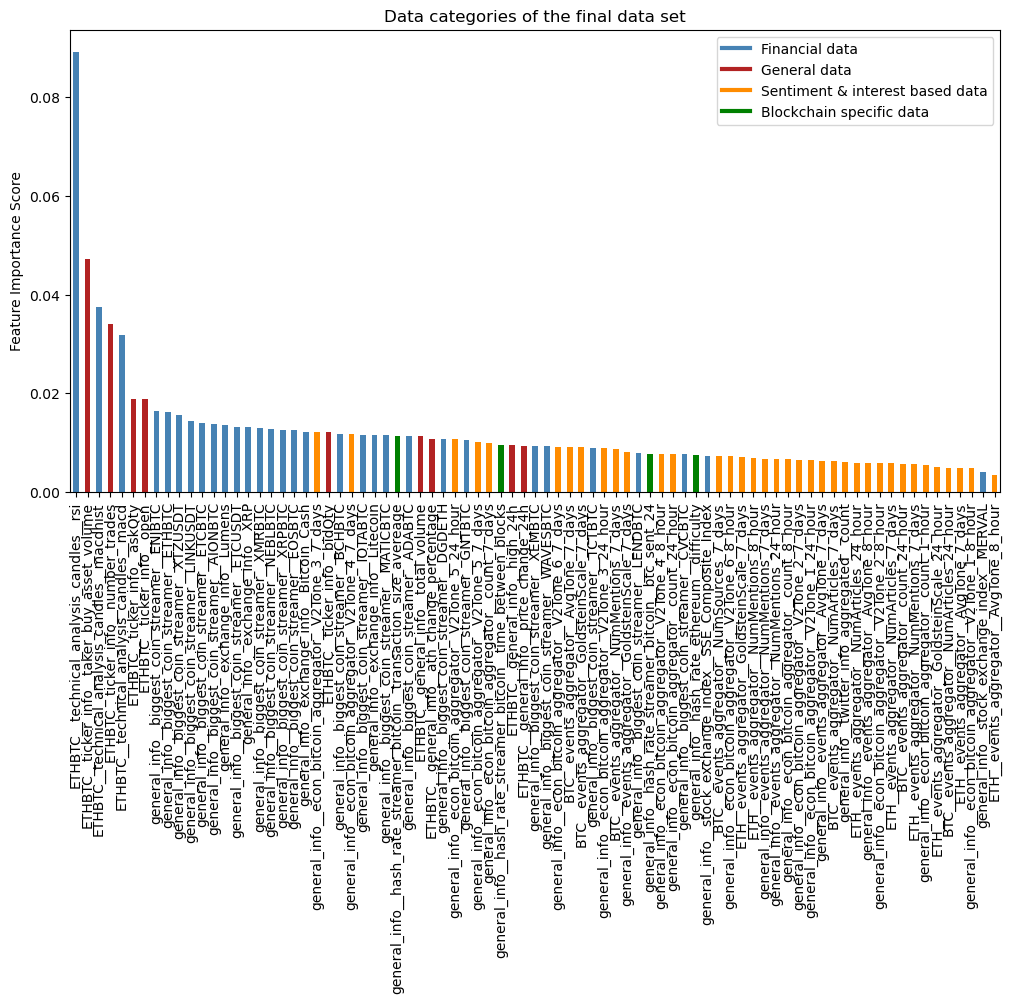

In [79]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6
Boruta.iloc[:81].plot(kind='bar',x = 'var', y='mean_imp_abs_norm', color=Boruta['color'], title='Data categories of the final data set')
plt.ylabel('Feature Importance Score')
plt.xlabel('')

from matplotlib.lines import Line2D

colors = ['steelblue','firebrick','darkorange', 'green']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Financial data', 'General data', 'Sentiment & interest based data','Blockchain specific data']
plt.legend(lines, labels)
plt.show()

In [ ]:
data = {"Cautious clustering":[185,172,258,292,300],
        "Greedy clustering":[115,115,121,117,121]};

index     = [0.75,0.80,0.85,0.90,0.95];


dataFrame = pd.DataFrame(data=data, index=index);


# Draw a vertical bar chart

dataFrame.plot.bar(stacked=False, title="");
plot.style.use('ggplot');
plot.show(block=True);